<a href="https://colab.research.google.com/github/kathrein/Shami-Sentiment-Analyzer/blob/master/Arabic_Bert_Paper7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

%matplotlib inline

import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


# Load Dataset

In [ ]:
# Load the dataset into a pandas dataframe.
#df = pd.read_csv("./Madar6.csv", delimiter=';', header=None, names=['sentence', 'label'])
#df = pd.read_csv("./shami.csv", delimiter=';', header=None, names=['sentence', 'label'],encoding = "utf-8")
#df = pd.read_csv("/Users/xabuka/PycharmProjects/Shami-Sentiment-Analyzer/data/ASTD/padic.csv", delimiter=';', header=None, names=['sentence', 'label'],encoding = "utf-8")

#df = pd.read_csv("./test_Arabic_tweets.tsv", delimiter='\t', header=None, names=['label_tag','sentence', 'label'],encoding = "utf-16")
df = pd.read_csv("./40k.csv", delimiter=';', header=None, names=['sentence', 'label'],encoding = "utf-8")
#df = pd.read_csv("./2_labr_train.csv", delimiter=';', header=None, names=['label','sentence'],encoding = "utf-8")
#df = pd.read_csv("./astd.csv", delimiter=';', header=None, names=['sentence','label_tag', 'label'],encoding = "utf-8")
#df = pd.read_csv("./ATSAD.csv", delimiter=';', header=None, names=['label_tag','sentence', 'label'],encoding = "utf-8")
# Report the number of sentences.
print('Number of  sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df = df.sample(frac=1).reset_index(drop=True)
#df.head(10)

Number of  sentences: 40,000



In [ ]:
all_sentences = df.sentence.values
df.label = pd.factorize(df.label)[0]
all_labels = df.label.values

print(len(all_sentences))
#if we have two seperated files for train and test, pleease commit the following code
# and remove word all_ from the previous two lines.
from sklearn.model_selection import train_test_split

# as we have separate test set , then no need to split here
train_df, test_df = train_test_split(df, test_size=0.1)
#train_df = df
X_train = train_df.sentence.values

#convert labels to int
#train_df.label = pd.factorize(train_df.label)[0]
print('Number of total training sentences: {:,}\n'.format(X_train.shape[0]))
#print(train_df.sample(10))
y_train = train_df.label.values
#print(len(X_train))
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1, random_state=2020)
#print(len(X_val))
#print(labels[0:10])
#print(len(y_train))
df.sample(10)

40000
Number of total training sentences: 36,000



,sentence,label
6821,كنت إظن وكنت إظن وخاب ظني .,0
19168,لا شوفته على اليوتيوب بس ماعجبنيش .,0
31121,خلاص انا مش زعلانه .,1
7361,اولا احنا كدا طول عمرنا شعب بيحب الهزار والضحك...,0
39665,الحب و الاحساس و فى اختيار الناس .بيمشى على كي...,0
2120,سيبك من اى حاجه مضايقاك البطيخ طلع .,1
30305,انتى جننتينا اقسم بالله .,0
8203,تفاهات لا تعليق بجد .,0
12579,نفسك مفتوحة اوى .,1
32691,لماذا نشتاق لطفولتنا ؟ لأنها المرحلة الوحيدة ا...,1


In [ ]:
df = test_df
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))

# Create sentence and label lists
X_test = test_df.sentence.values

#df.label = pd.factorize(df.label)[0]
y_test = test_df.label.values

Number of test sentences: 4,000



# Machine Learning

In [ ]:
# Helper functions 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
def train_model(model, data, targets):
    text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', model),
    ])
    text_clf.fit(data, targets)
    return text_clf
def get_accuracy(trained_model,X, y):
    predicted = trained_model.predict(X)
    accuracy = np.mean(predicted == y)
    return accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
trained_clf_decision_tree = train_model(DecisionTreeClassifier(), X_train, y_train)
accuracy = get_accuracy(trained_clf_decision_tree,X_test, y_test)
print(f"Test dataset accuracy with DecisionTreeClassifier: {accuracy:.2f}")

Test dataset accuracy with DecisionTreeClassifier: 0.70


In [ ]:
from sklearn.naive_bayes import MultinomialNB
trained_clf_multinomial_nb = train_model(MultinomialNB(), X_train, y_train)
accuracy = get_accuracy(trained_clf_multinomial_nb,X_test, y_test)
print(f"Test dataset accuracy with MultinomialNB: {accuracy:.2f}")

Test dataset accuracy with MultinomialNB: 0.69


In [ ]:
from sklearn.svm import LinearSVC
trained_clf_linearSVC = train_model(LinearSVC(), X_train, y_train)
accuracy = get_accuracy(trained_clf_linearSVC,X_test, y_test)
print(f"Test dataset accuracy with LinearSVC: {accuracy:.2f}")

Test dataset accuracy with LinearSVC: 0.77


In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = train_model(RandomForestClassifier(), X_train, y_train)
accuracy = get_accuracy(trained_clf_random_forest,X_test, y_test)
print(f"Test dataset accuracy with RandomForestClassifier: {accuracy:.2f}")

Test dataset accuracy with RandomForestClassifier: 0.72


In [ ]:
d

# Preparetion for BERT Arabic 

In [ ]:
!pip install transformers

from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic")



# Define functions

In [ ]:
# Define preprocessing util function
def text_preprocessing(text):
    """
    - Remove entity mentions (eg. '@united')
    - Correct errors (eg. '&amp;' to '&')
    @param    text (str): a string to be processed.
    @return   text (Str): the processed string.
    """
  

    # Normalize unicode encoding
    text = unicodedata.normalize('NFC', text)
    # Remove '@name'
    text = re.sub(r'(@.*?)[\s]', ' ', text)

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)

    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    #Remove URLs
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '<URL>', text)


    return text

In [ ]:
# Create a function to tokenize a set of texts
import unicodedata
def preprocessing_for_bert(data,labels, version="mini", text_preprocessing_fn = text_preprocessing ):
    """Perform required preprocessing steps for pretrained BERT.
    @param    data (np.array): Array of texts to be processed.
    @return   input_ids (torch.Tensor): Tensor of token ids to be fed to a model.
    @return   attention_masks (torch.Tensor): Tensor of indices specifying which
                  tokens should be attended to by the model.
    """
    # Create empty lists to store outputs
    input_ids = []
    attention_masks = []
    tokenizer = AutoTokenizer.from_pretrained("asafaya/bert-mini-arabic") if version == "mini" else AutoTokenizer.from_pretrained("asafaya/bert-base-arabic")

    # For every sentence...
    for i,sent in enumerate(data):
        # `encode_plus` will:
        #    (1) Tokenize the sentence
        #    (2) Add the `[CLS]` and `[SEP]` token to the start and end
        #    (3) Truncate/Pad sentence to max length
        #    (4) Map tokens to their IDs
        #    (5) Create attention mask
        #    (6) Return a dictionary of outputs
        encoded_sent = tokenizer.encode_plus(
            text=text_preprocessing_fn(sent),  # Preprocess sentence
            add_special_tokens=True,        # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,                  # Max length to truncate/pad
            padding='max_length',        # Pad sentence to max length
            #return_tensors='pt',           # Return PyTorch tensor
            return_attention_mask=True,     # Return attention mask
            truncation = True 
            )
        
        # Add the outputs to the lists
        input_ids.append(encoded_sent.get('input_ids'))
        attention_masks.append(encoded_sent.get('attention_mask'))
    # Convert lists to tensors
    input_ids = torch.tensor(input_ids)
    attention_masks = torch.tensor(attention_masks)
    input_labels = torch.tensor(labels) 


    return input_ids, attention_masks,input_labels

In [ ]:
# Specify `MAX_LEN`
MAX_LEN =  280
#MAX_LEN = 130# ASTD #512 for labr #50 for train_tweets and self tweet #120 for 40k tweets
# Print sentence 0 and its encoded token ids
token_ids = list(preprocessing_for_bert([X_train[0]],[y_train[0]])[0].squeeze().numpy())
print('Original: ', X_train[0])
print('Token IDs: ', token_ids)

# Run function `preprocessing_for_bert` on the train set and the validation set
print('Tokenizing data...')
train_inputs, train_masks,_ = preprocessing_for_bert(X_train,y_train)
val_inputs, val_masks,_ = preprocessing_for_bert(X_val,y_val)

Original:  لينك برنامج الاوفيس كامل عربي.
Token IDs:  [2, 5119, 1014, 2776, 29996, 1801, 4092, 4542, 18, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Tokenizing data...


In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# Convert other data types to torch.Tensor
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# For fine-tuning BERT, the authors recommend a batch size of 16 or 32.
BATCH_SIZE = 16

# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)

In [ ]:
%%time
import torch
import torch.nn as nn
from transformers import BertModel

# Create the BertClassfier class
class BertClassifier(nn.Module):
    """Bert Model for Classification Tasks.
    """
    def __init__(self, freeze_bert=False, version="mini"):
        """
        @param    bert: a BertModel object
        @param    classifier: a torch.nn.Module classifier
        @param    freeze_bert (bool): Set `False` to fine-tune the BERT model
        """
        super(BertClassifier, self).__init__()
        # Specify hidden size of BERT, hidden size of our classifier, and number of labels
        D_in = 256 if version == "mini" else 768
        H, D_out = 50, 2

        # Instantiate BERT model
        self.bert = AutoModel.from_pretrained("asafaya/bert-mini-arabic") if version == "mini" else AutoModel.from_pretrained("asafaya/bert-base-arabic")
        # Instantiate an one-layer feed-forward classifier
        self.classifier = nn.Sequential(
            nn.Linear(D_in, H),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(H, D_out)
        )

        # Freeze the BERT model
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False
        
    def forward(self, input_ids, attention_mask):
        """
        Feed input to BERT and the classifier to compute logits.
        @param    input_ids (torch.Tensor): an input tensor with shape (batch_size,
                      max_length)
        @param    attention_mask (torch.Tensor): a tensor that hold attention mask
                      information with shape (batch_size, max_length)
        @return   logits (torch.Tensor): an output tensor with shape (batch_size,
                      num_labels)
        """
        # Feed input to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)
        
        # Extract the last hidden state of the token `[CLS]` for classification task
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed input to classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

CPU times: user 41 µs, sys: 0 ns, total: 41 µs
Wall time: 44.8 µs


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

from torch.optim import SparseAdam, Adam
def initialize_model(epochs=4, version="mini"):
    """Initialize the Bert Classifier, the optimizer and the learning rate scheduler.
    """
    # Instantiate Bert Classifier
    bert_classifier = BertClassifier(freeze_bert=False, version=version)
    # Tell PyTorch to run the model on GPU
    bert_classifier.to(device)

    # Create the optimizer
    optimizer = AdamW(params=list(bert_classifier.parameters()),
                      lr=5e-5,    # Default learning rate
                      eps=1e-8    # Default epsilon value
                      )

    # Total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Set up the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
import random
import time
import torch
import torch.nn as nn
# Specify loss function
loss_fn = nn.CrossEntropyLoss()

def set_seed(seed_value=42):
    """Set seed for reproducibility.
    """
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

def train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False):
    """Train the BertClassifier model.
    """
    # Start training loop
    print("Start training...\n")
    
    loss_values = []

    for epoch_i in range(epochs):
        # =======================================
        #               Training
        # =======================================
        # Print the header of the result table
        print(f"{'Epoch':^7} | {'Batch':^7} | {'Train Loss':^12} | {'Val Loss':^10} | {'Val Acc':^9} | {'Elapsed':^9}")
        print("-"*70)

        # Measure the elapsed time of each epoch
        t0_epoch, t0_batch = time.time(), time.time()

        # Reset tracking variables at the beginning of each epoch
        total_loss, batch_loss, batch_counts = 0, 0, 0

        # Put the model into the training mode
        model.train()

        # For each batch of training data...
        for step, batch in enumerate(train_dataloader):
            batch_counts +=1
            # Load batch to GPU
            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            # Zero out any previously calculated gradients
            model.zero_grad()

            # Perform a forward pass. This will return logits.
            logits = model(b_input_ids, b_attn_mask)

            # Compute loss and accumulate the loss values
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            # Perform a backward pass to calculate gradients
            loss.backward()

            # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            # Update parameters and the learning rate
            optimizer.step()
            scheduler.step()

            # Print the loss values and time elapsed for every 20 batches
            if (step % 20 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                # Calculate time elapsed for 20 batches
                time_elapsed = time.time() - t0_batch

                # Print training results
                print(f"{epoch_i + 1:^7} | {step:^7} | {batch_loss / batch_counts:^12.6f} | {'-':^10} | {'-':^9} | {time_elapsed:^9.2f}")

                # Reset batch tracking variables
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        # Calculate the average loss over the entire training data
        avg_train_loss = total_loss / len(train_dataloader)
        loss_values.append(avg_train_loss)
        print("-"*70)
        # =======================================
        #               Evaluation
        # =======================================
        if evaluation == True:
            # After the completion of each training epoch, measure the model's performance
            # on our validation set.
            val_loss, val_accuracy = evaluate(model, val_dataloader)

            # Print performance over the entire training data
            time_elapsed = time.time() - t0_epoch
            
            print(f"{epoch_i + 1:^7} | {'-':^7} | {avg_train_loss:^12.6f} | {val_loss:^10.6f} | {val_accuracy:^9.2f} | {time_elapsed:^9.2f}")
            print("-"*70)
        print("\n")
    
    print("Training complete!")
    return loss_values


def evaluate(model, val_dataloader):
    """After the completion of each training epoch, measure the model's performance
    on our validation set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    # Tracking variables
    val_accuracy = []
    val_loss = []

    # For each batch in our validation set...
    for batch in val_dataloader:
        # Load batch to GPU
        b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)

        # Compute loss
        loss = loss_fn(logits, b_labels)
        val_loss.append(loss.item())

        # Get the predictions
        preds = torch.argmax(logits, dim=1).flatten()

        # Calculate the accuracy rate
        accuracy = (preds == b_labels).cpu().numpy().mean() * 100
        val_accuracy.append(accuracy)

    # Compute the average accuracy and loss over the validation set.
    val_loss = np.mean(val_loss)
    val_accuracy = np.mean(val_accuracy)

    return val_loss, val_accuracy

In [ ]:
#Prediction 
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, roc_curve, auc

def bert_predict(model, test_dataloader):
    """Perform a forward pass on the trained BERT model to predict probabilities
    on the test set.
    """
    # Put the model into the evaluation mode. The dropout layers are disabled during
    # the test time.
    model.eval()

    all_logits,true_labels,predictions = [],[],[]

    # For each batch in our test set...
    for batch in test_dataloader:
        # Load batch to GPU
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_attn_mask, b_labels = batch
        #b_input_ids, b_attn_mask = tuple(t.to(device) for t in batch)[:2]

        # Compute logits
        with torch.no_grad():
            logits = model(b_input_ids, b_attn_mask)
        all_logits.append(logits)
        #pred = all_logits
        #move labels to cpu
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        #pred = pred.detach().cpu().numpy()



  
    # Store predictions and true labels
        predictions.append(logits)
        true_labels.append(label_ids)

    # Concatenate logits from each batch
    all_logits = torch.cat(all_logits, dim=0)

    # Apply softmax to calculate probabilities
    probs = F.softmax(all_logits, dim=1).cpu().numpy()

    return probs,predictions,true_labels


def evaluate_roc(probs, y_true, model_name, dataset_name, test_dataset_name):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')
       
    # Get accuracy over the test set
    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title(f" ROC of {model_name}  trained on {dataset_name} dataset & evaluated on the {test_dataset_name} dataset ")
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Start training BERT

In [ ]:
set_seed(42) 
bert_classifier, optimizer, scheduler = initialize_model(epochs=3)
loss_values = train(bert_classifier, train_dataloader, val_dataloader, epochs=3, evaluation=True)

Some weights of the model checkpoint at asafaya/bert-mini-arabic were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Start training...

 Epoch  |  Batch  |  Train Loss  |  Val Loss  |  Val Acc  |  Elapsed 
----------------------------------------------------------------------
   1    |   20    |   0.701696   |     -      |     -     |   2.68   
   1    |   40    |   0.673388   |     -      |     -     |   2.37   
   1    |   60    |   0.601482   |     -      |     -     |   2.40   
   1    |   80    |   0.622791   |     -      |     -     |   2.38   
   1    |   100   |   0.600234   |     -      |     -     |   2.37   
   1    |   120   |   0.581507   |     -      |     -     |   2.39   
   1    |   140   |   0.596148   |     -      |     -     |   2.37   
   1    |   160   |   0.616759   |     -      |     -     |   2.37   
   1    |   180   |   0.564759   |     -      |     -     |   2.38   
   1    |   200   |   0.543049   |     -      |     -     |   2.38   
   1    |   220   |   0.525521   |     -      |     -     |   2.38   
   1    |   240   |   0.531174   |     -      |     -     |   2.37   


In [ ]:
# Saving the model for future runs

import pickle
filename = 'trained_model_40k_3_epochs.sav'
pickle.dump(bert_classifier, open(filename, 'wb'))

In [ ]:
# # Loading the model (to avoid retraining in reruns)

# import pickle
# filename = 'trained_model_mini_with_emojis.sav'
# f = open(filename, 'rb')
# bert_classifier = pickle.load(f)

# Test BERT

AUC: 0.9011
Accuracy: 82.19%


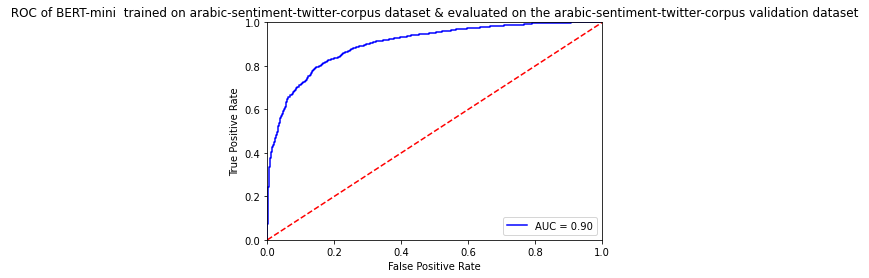

In [ ]:

#Predict and evaluate validation subset
# Compute predicted probabilities on the validation set
probs,_,_ = bert_predict(bert_classifier, val_dataloader)

# Evaluate the Bert classifier
evaluate_roc(probs, y_val, "BERT-mini", "arabic-sentiment-twitter-corpus", "arabic-sentiment-twitter-corpus validation")

In [ ]:
#Predict and evaluate test subset
# Run `preprocessing_for_bert` on the test set
print('Tokenizing data...')
test_inputs, test_masks, test_labels = preprocessing_for_bert(X_test,y_test)
# Create the DataLoader for our test set
test_dataset = TensorDataset(test_inputs, test_masks,test_labels)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

probs, predictions,true_labels = bert_predict(bert_classifier, test_dataloader)


Tokenizing data...


In [ ]:
# Compute predicted probabilities on the test set
#probs, predictions,true_labels = bert_predict(bert_classifier, test_dataloader)

#print(type(predictions[0]))
#print(type(true_labels[0]))

# Get predictions from the probabilities
threshold = 0.5
preds = np.where(probs[:, 1] > threshold, 1, 0)

# Number of tweets predicted non-negative
print("no-negative tweets ratio ", preds.sum()/len(preds))


no-negative tweets ratio  0.483


In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_set = []

# Evaluate each test batch using Matthew's correlation coefficient
print('Calculating Matthews Corr. Coef. for each batch...')

# For each input batch...
for i in range(len(true_labels)):
  
  # The predictions for this batch are a 2-column ndarray (one column for "0" 
  # and one column for "1"). Pick the label with the highest value and turn this
  # in to a list of 0s and 1s.np.argmax(predictions[i], axis=1).flatten()
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  
  # Calculate and store the coef for this batch.  
  matthews = matthews_corrcoef(true_labels[i], pred_labels_i)                
  matthews_set.append(matthews)


  # Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true_labels for item in sublist]

# Calculate the MCC
mcc = matthews_corrcoef(flat_true_labels, flat_predictions)

print('MCC: %.3f' % mcc)

Calculating Matthews Corr. Coef. for each batch...
MCC: 0.659


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(flat_true_labels, flat_predictions))
print(confusion_matrix(flat_true_labels, flat_predictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1946
           1       0.85      0.80      0.83      2054

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000

[[1664  282]
 [ 404 1650]]


AUC: 0.9011
Accuracy: 82.85%


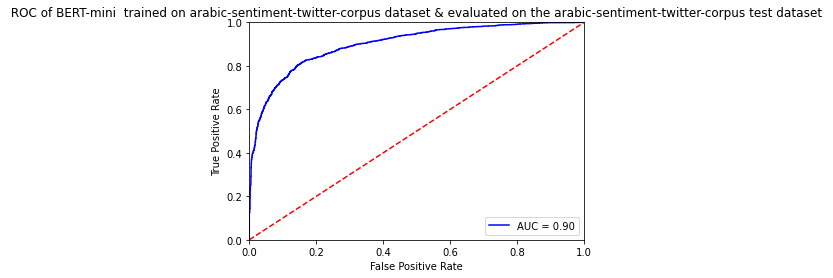

In [ ]:
# Evaluate the Bert classifier for unseen test data
evaluate_roc(probs, y_test,"BERT-mini", "arabic-sentiment-twitter-corpus","arabic-sentiment-twitter-corpus test")

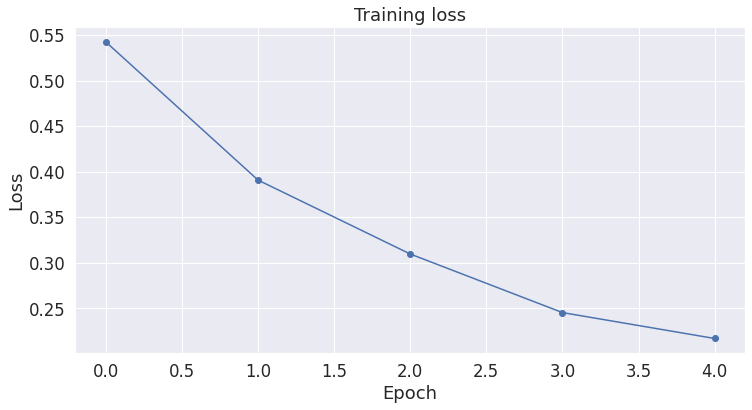

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()